Let us start off with the base model for Multi layer perceptron or ANN(Artificial Neural Network). 

Then I will modify different parameters one by one and see what affect that has on the overall Validation loss and Accuracy. The paramters we will take into account are as below - 

1. No of epochs
2. Batch size
3. Network configuration
a. Number of neurons in a layer
b. Number of layers
4. Learning rate
5. Activation functions
6. Dropout rates

Then, we will combine the best of these models and see which models work the best and what causes overfitting/underfitting. 


50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_128 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_182 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_129 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_183 (Dense)            (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

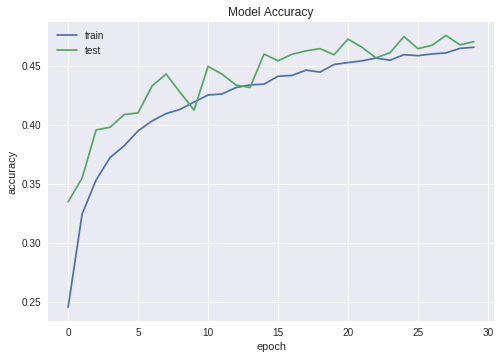

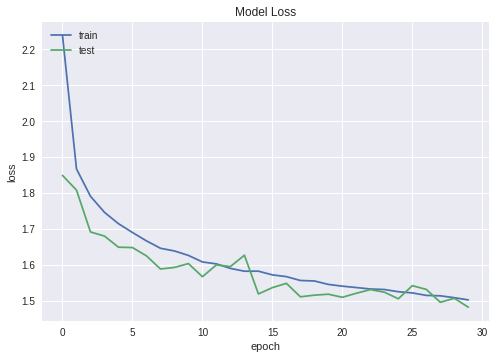

In [53]:
#Let us run the Baseline model 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Experiment for checking the effect of Different Optimizers - RMSprop , SGD , Adadelta , Adamax , Adam 

In [0]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

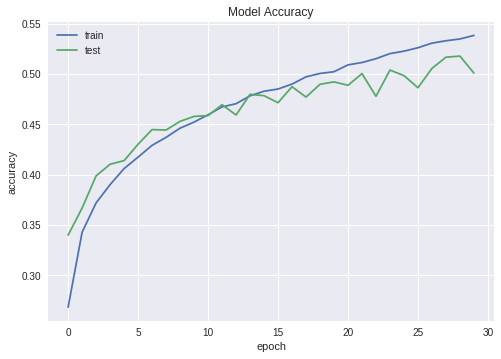

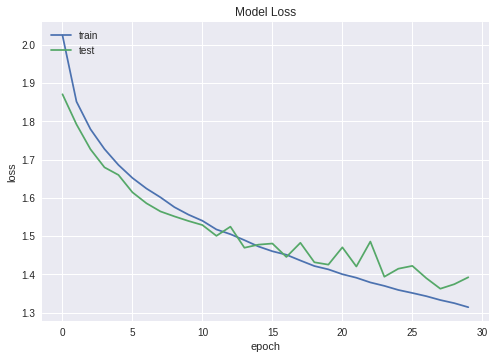

In [0]:
# SGD 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [0]:
# Adam

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adam(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

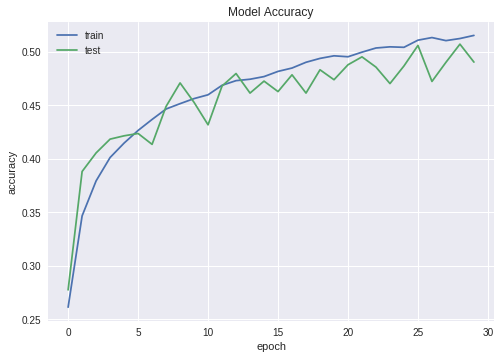

In [0]:
# RMSprop 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

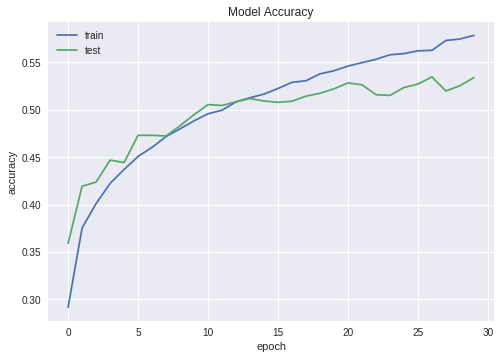

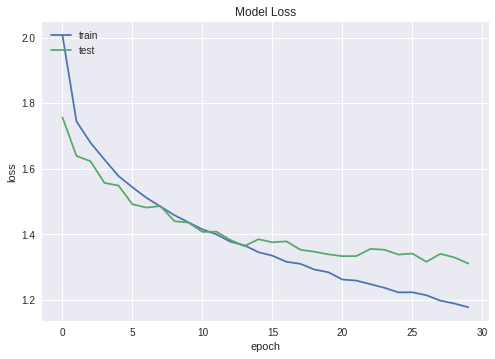

In [0]:
# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




**So, the best Optimizer is Adamax as per the above experiments . **

**Experiment for checking the effect of Different number of Epochs - 10 , 25 , 50, 60 , 100 **

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [===================

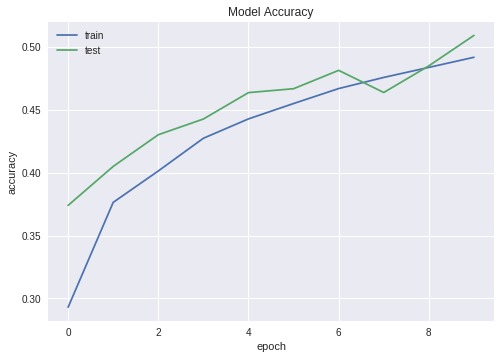

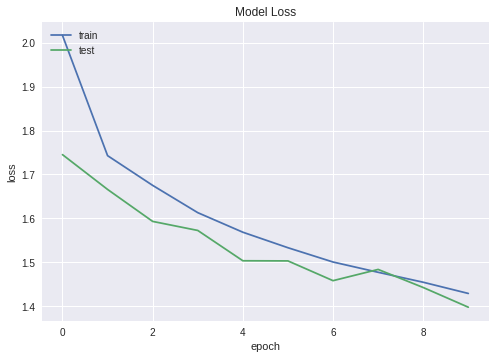

In [0]:
# Experiment for no of epochs using the best optimizer 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [===================

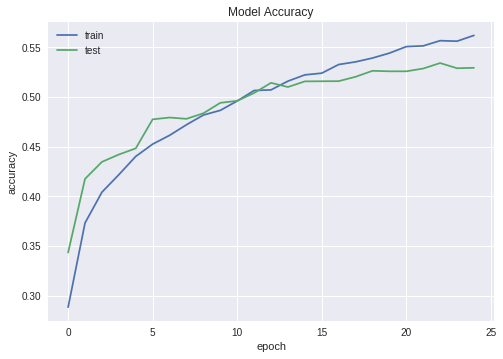

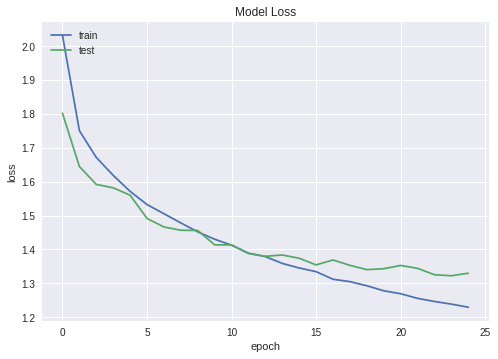

In [0]:
# Experiment for no of epochs for the best optimizer 

# SGD 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 25


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Using TensorFlow backend.


170500096/170498071 [==============================] - 35s 0us/step
50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, v

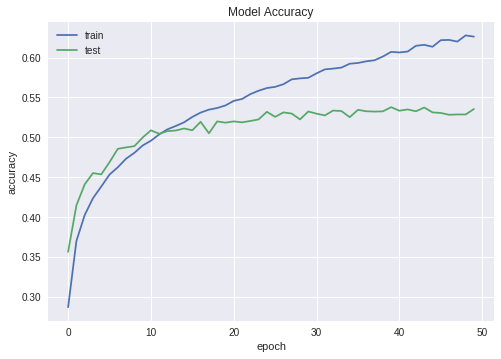

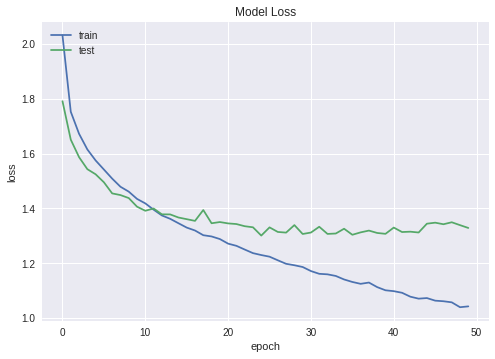

In [0]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




Using TensorFlow backend.


170500096/170498071 [==============================] - 26s 0us/step
50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
___________________________________

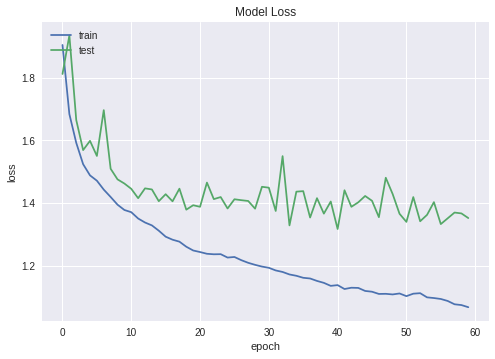

In [0]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 60


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==================

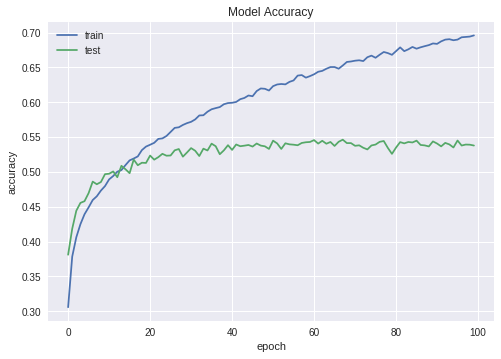

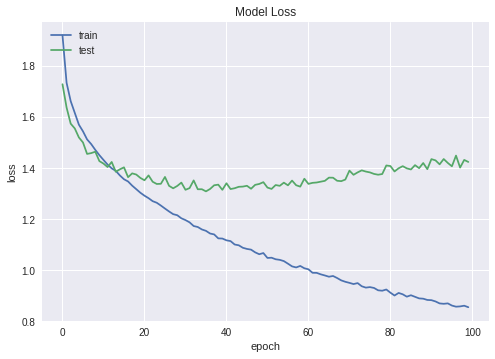

In [12]:
 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adamax
import matplotlib.pyplot as plt

 
batch_size = 128 
num_classes = 10
epochs = 100


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=Adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




**So, the best Epoch as per my models is 50 for this dataset **

**Experiment for checking the effect of Different number of Batch Size - 16 , 32, 64, 128, 256, 512**

In [0]:
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
import matplotlib.pyplot as plt

 
batch_size = 16
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adam(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

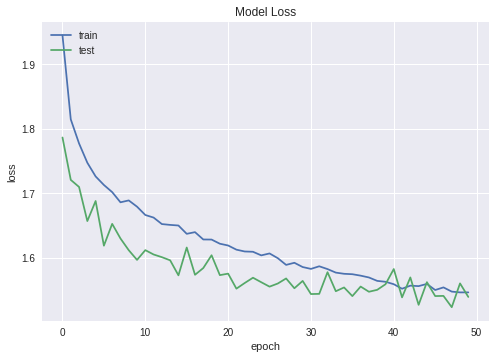

In [5]:
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam
import matplotlib.pyplot as plt

 
batch_size = 32
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adam(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

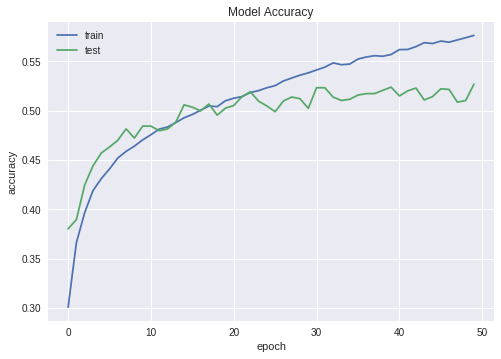

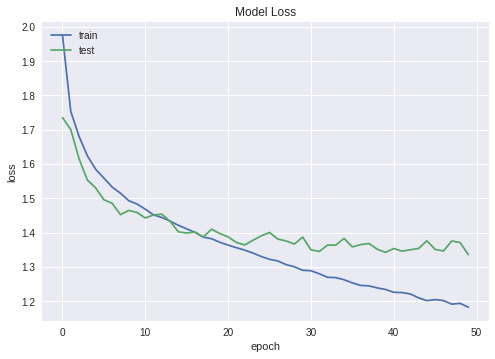

In [6]:
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 64
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

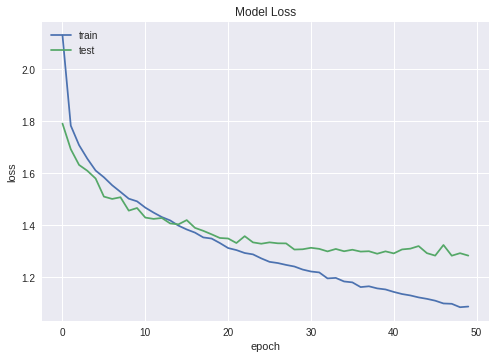

In [7]:
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

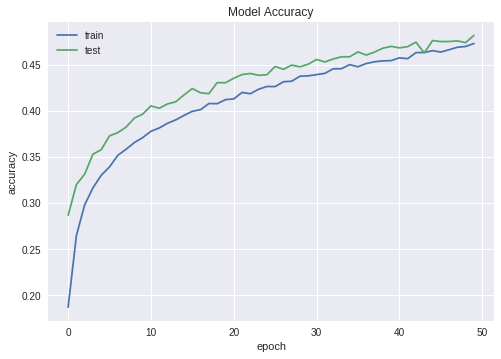

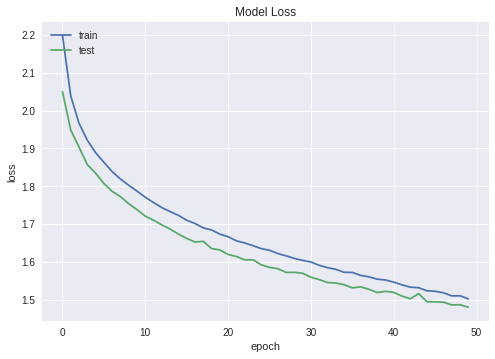

In [8]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

 
batch_size = 512
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [===================

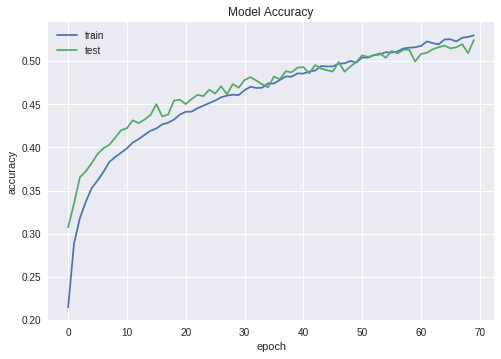

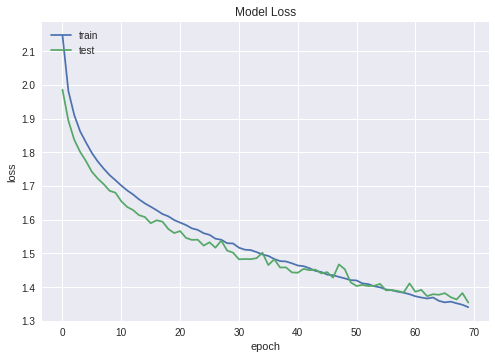

In [9]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 512
num_classes = 10
epochs = 70


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.02, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




**So, the best Optimizer is Adamax , Best Epoch Number is 50, Best Batch size is 256. **

**Experiment for checking the effect of Different Configration of the Network - Layers & Neurons **

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 923,402
Trainable params: 923,402
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

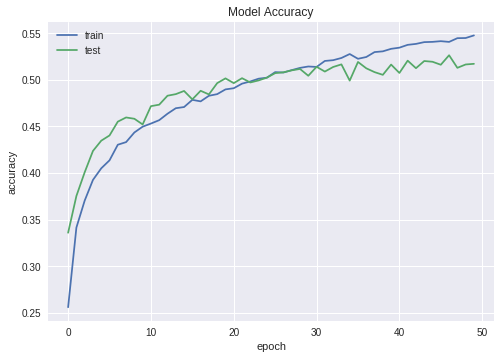

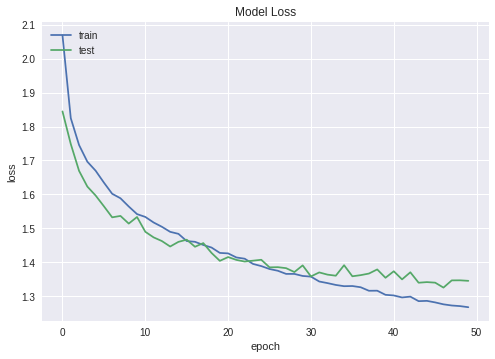

In [10]:
#Experiment for the Network (Using the best Optimizer , Epoch , Batch Size)


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 923,402
Trainable params: 923,402
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

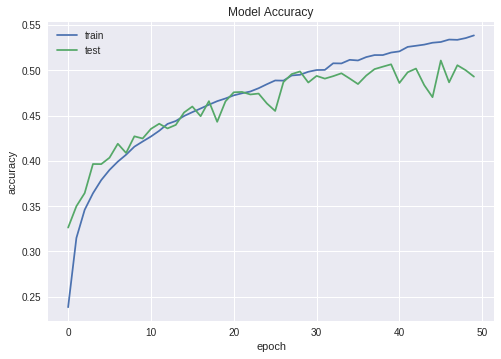

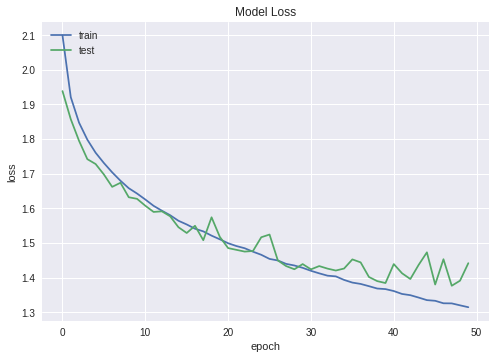

In [11]:
#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.02, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               393344    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1

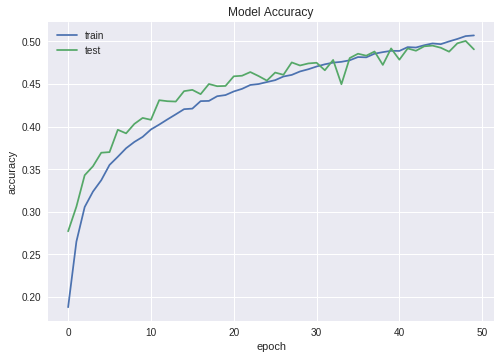

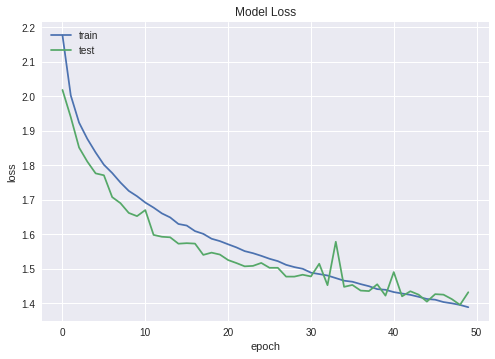

In [12]:
#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.02, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1

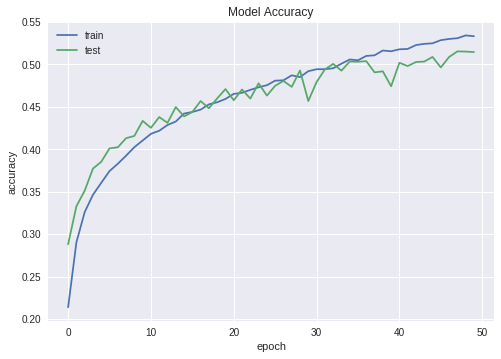

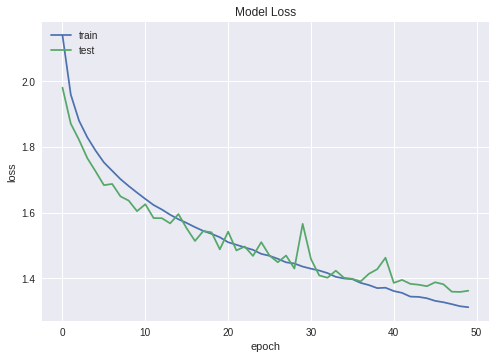

In [13]:
#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.02, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1024)              263168    
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1

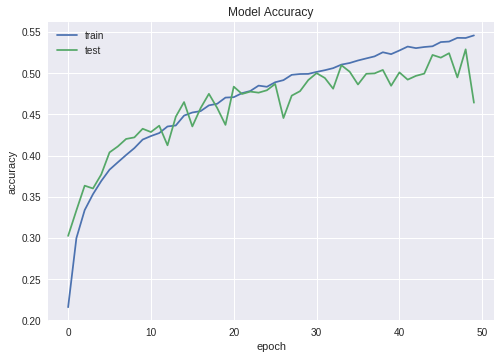

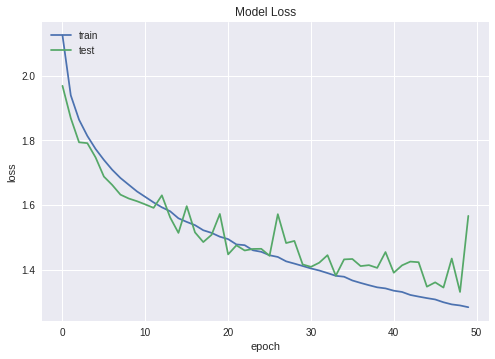

In [16]:
#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.02, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_46 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 1

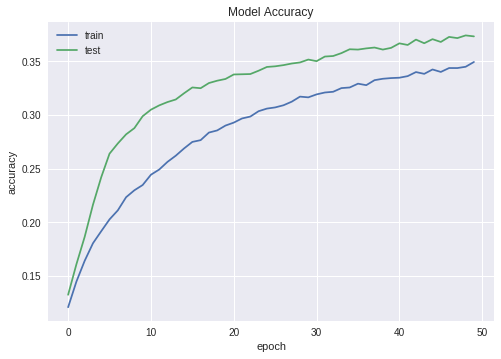

In [21]:
#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt
from keras import backend as K

 

batch_size = 128
num_classes = 10
epochs = 50

def swish(x):
    return K.sigmoid(x) * x


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adadelta(lr=0.001, rho=0.95, epsilon=1e-6),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1

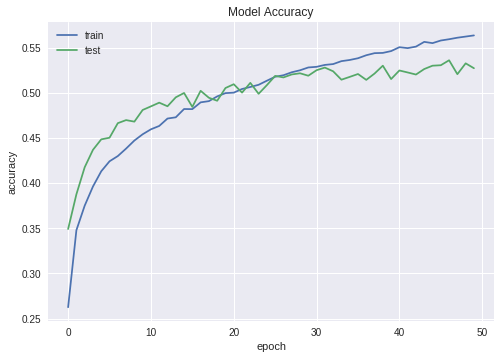

In [16]:
# Relu 

#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt
from keras import backend as K

 

batch_size = 256
num_classes = 10
epochs = 50

def swish(x):
    return K.sigmoid(x) * x


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_49 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_50 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 1

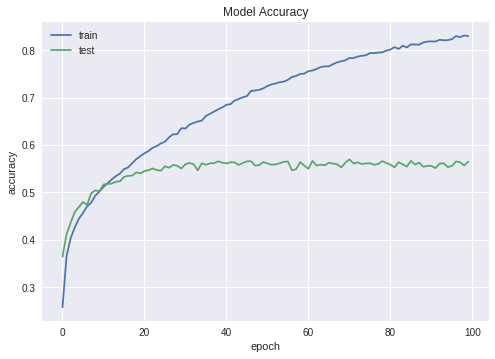

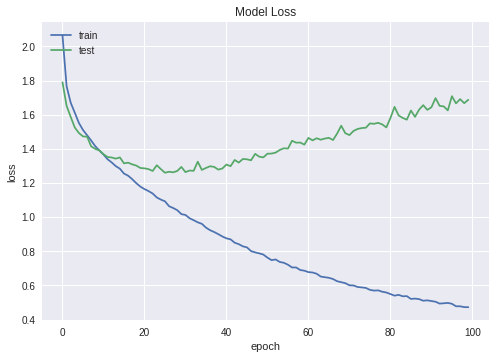

In [22]:
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 100


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation=swish, input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [17]:
# Relu 

#Experiment for the Network 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adadelta
import matplotlib.pyplot as plt
from keras import backend as K

 

batch_size = 256
num_classes = 10
epochs = 50

def swish(x):
    return K.sigmoid(x) * x


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               393344    
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                2570      
Total params: 428,938
Trainable params: 428,938
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

In [23]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 200
num_classes = 10
epochs = 35


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_53 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 1

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               393344    
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 1

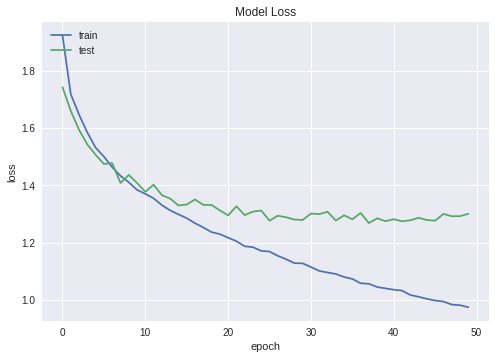

In [18]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(128, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1

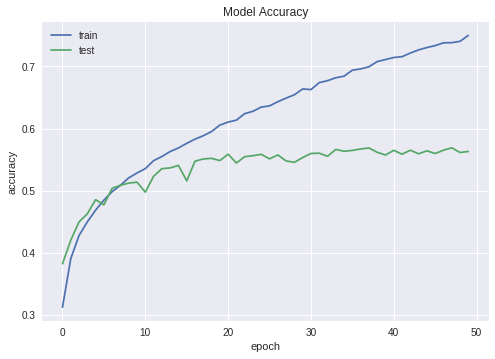

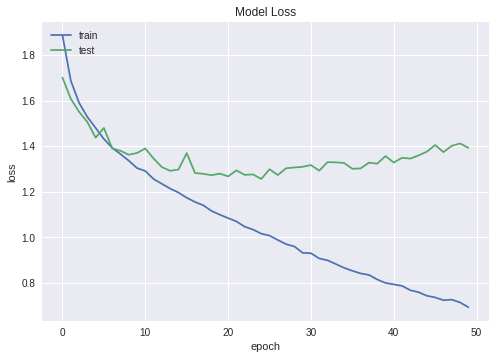

In [19]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 1

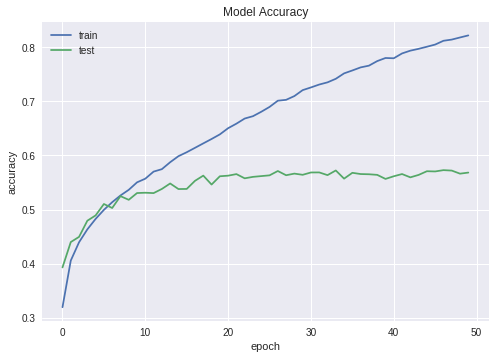

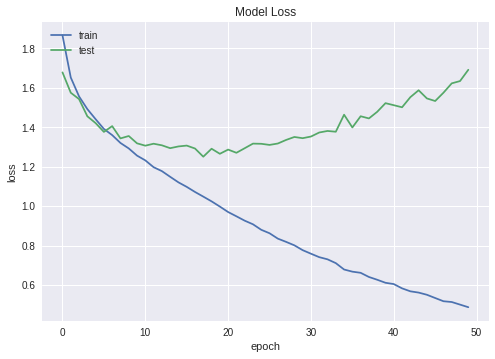

In [20]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(1024, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===================

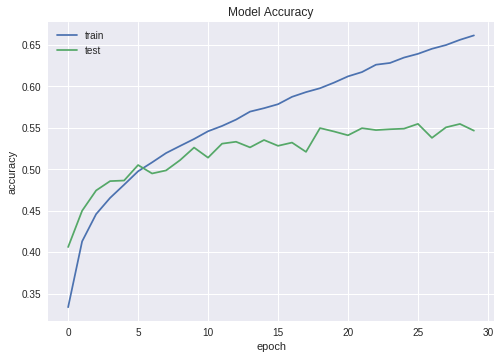

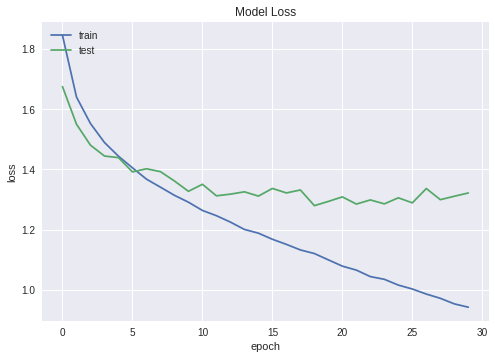

In [13]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 128
num_classes = 10
epochs = 30


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
#model.add(Dense(128, activation=swish,kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1

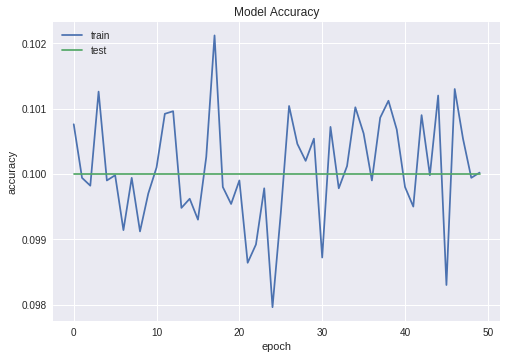

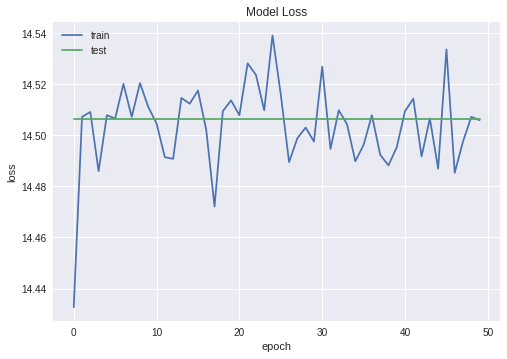

In [15]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(512,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.3),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_62 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 1

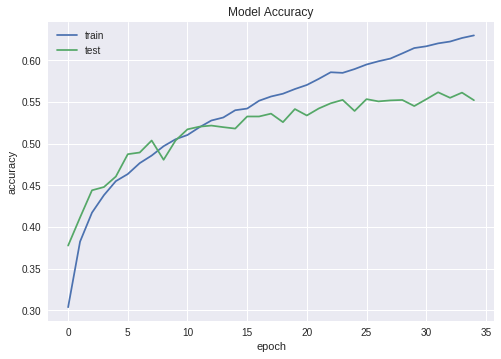

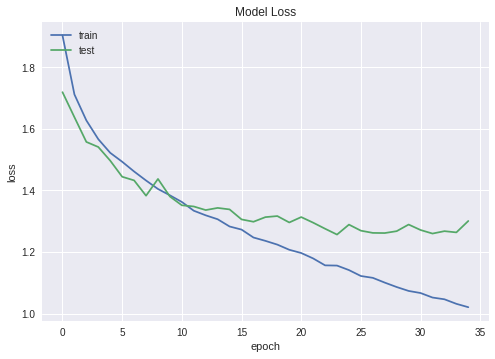

In [27]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 200
num_classes = 10
epochs = 35


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_64 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_65 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_66 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 1

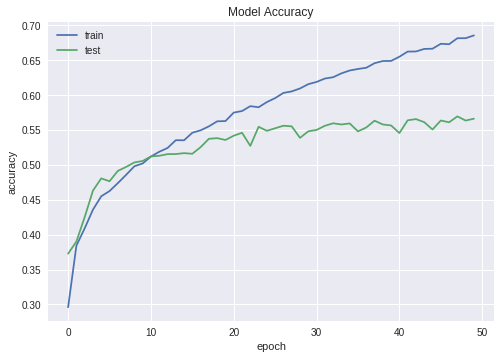

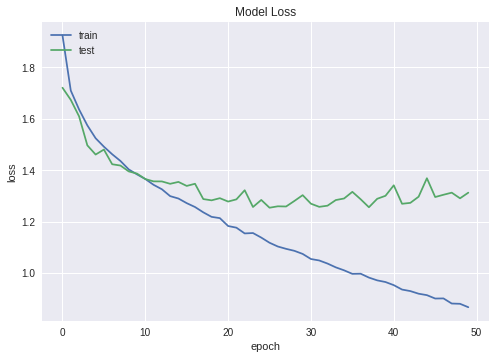

In [28]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 200
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(256,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1

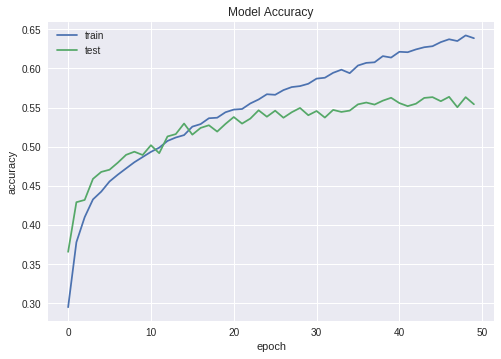

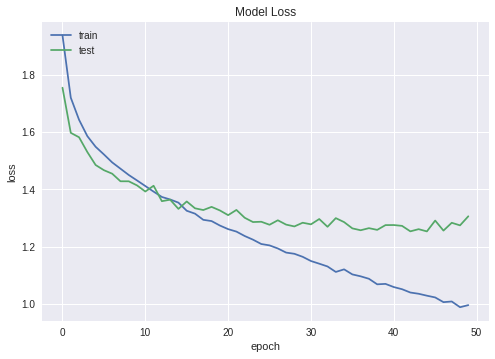

In [2]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 200
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(256,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






170500096/170498071 [==============================] - 26s 0us/step
50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
___________________________________

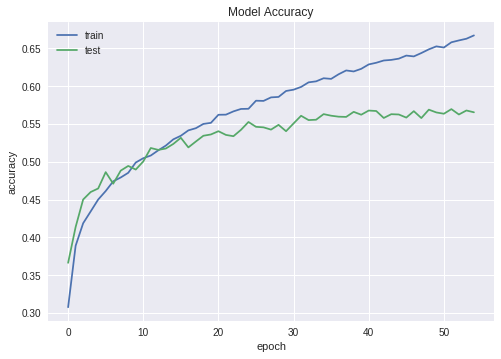

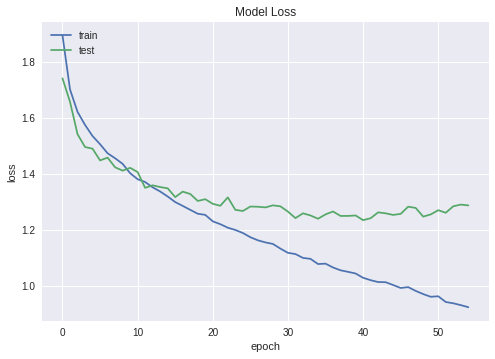

In [2]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 200
num_classes = 10
epochs = 55


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1

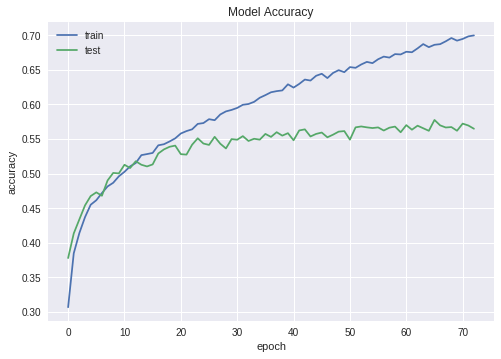

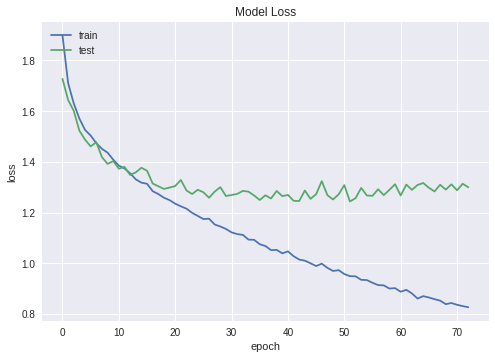

In [3]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 73


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.1))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1

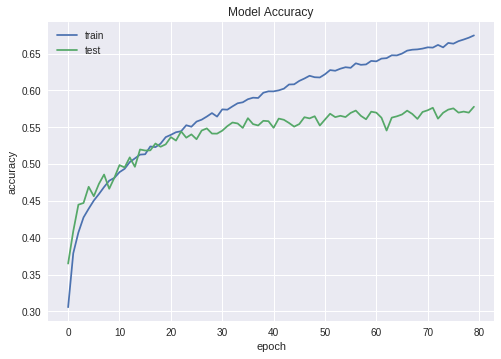

In [4]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 220
num_classes = 10
epochs = 80


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1

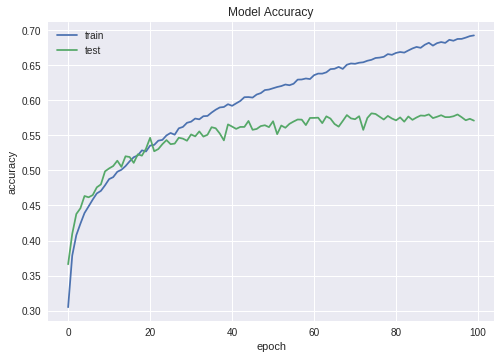

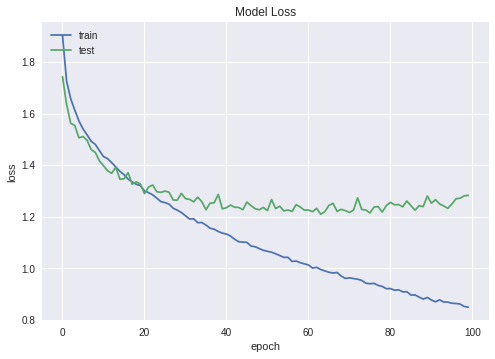

In [6]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 100


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0022),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1

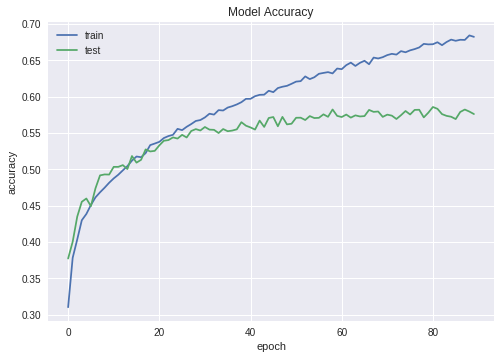

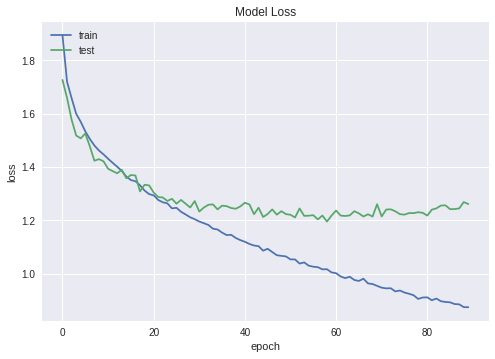

In [9]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 90


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0022),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1

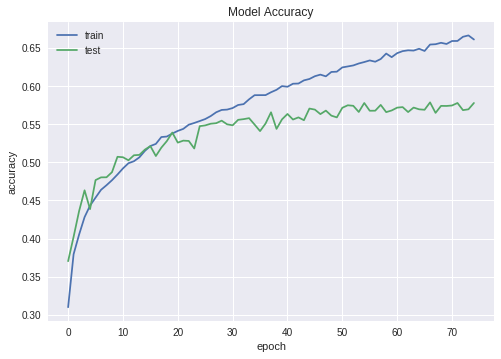

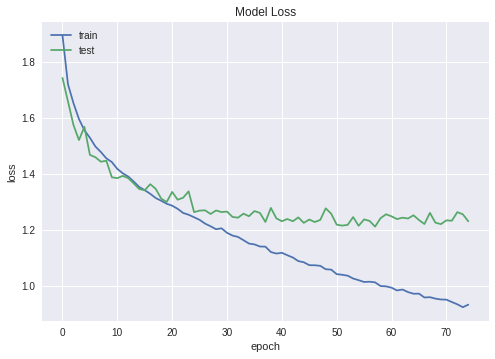

In [12]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 75


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0025),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [21]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, PReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50



(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.18))
model.add(Dense(512, input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(256, input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.007),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 256)               786688    
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 256)               256       
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               131584    
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 512)               512       
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 2

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1

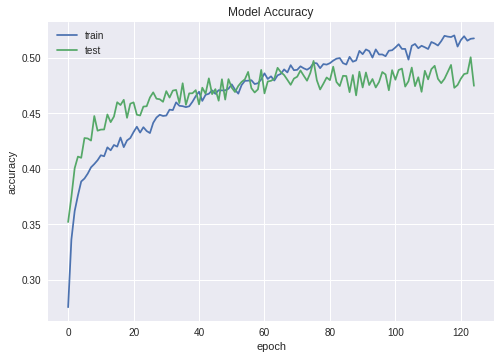

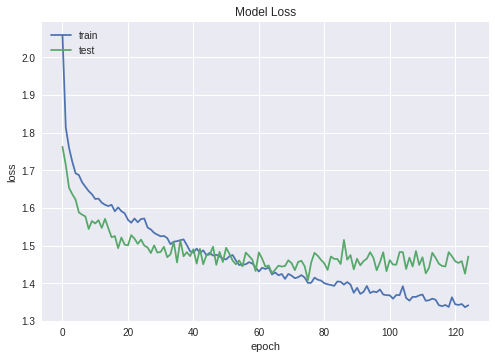

In [11]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, PReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt
from keras import backend as K

 
batch_size = 256
num_classes = 10
epochs = 125

def swish(x):
    return K.sigmoid(x) * x


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation=swish, input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(swish)
model.add(Dropout(0.18))
model.add(Dense(512, activation=swish, input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.3))
model.add(Dense(256,activation=swish, input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(PReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.007),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [13]:


import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 85


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0025),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 1

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 1

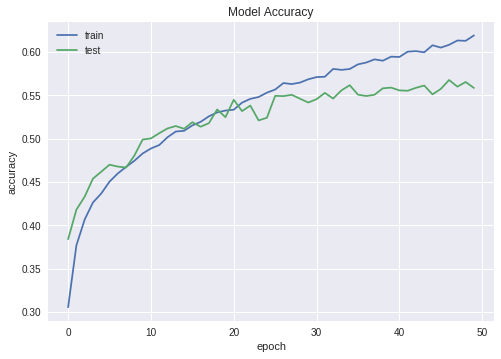

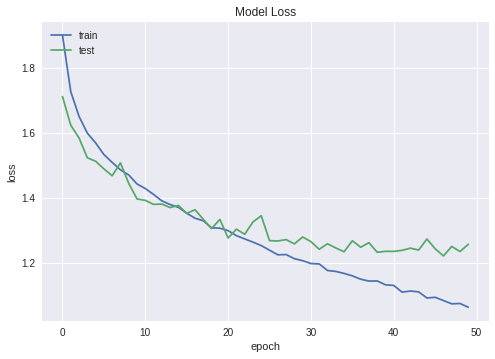

In [22]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0025),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1

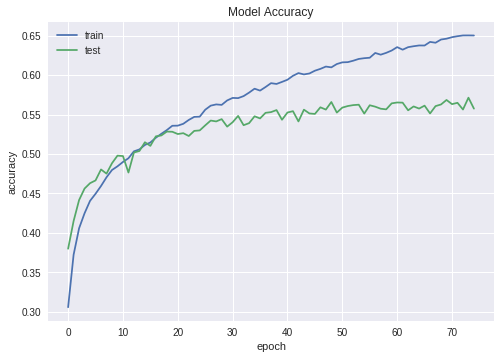

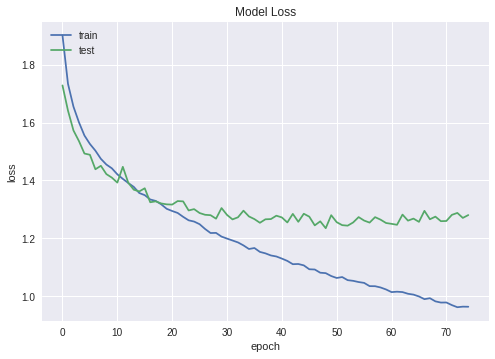

In [11]:

#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adam
import matplotlib.pyplot as plt

 
batch_size = 230
num_classes = 10
epochs = 75


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,activation='elu',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(128,activation='elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
#model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adam(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               786688    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1

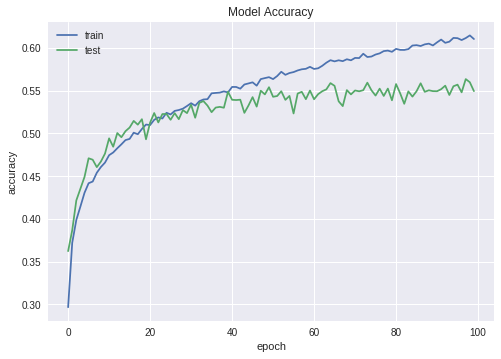

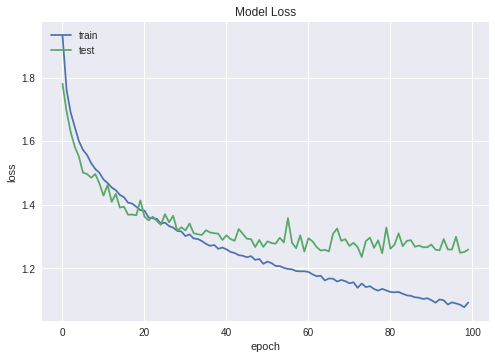

In [8]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 100


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256,kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512,kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.35))
model.add(Dense(128, kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.24))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0022),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 1

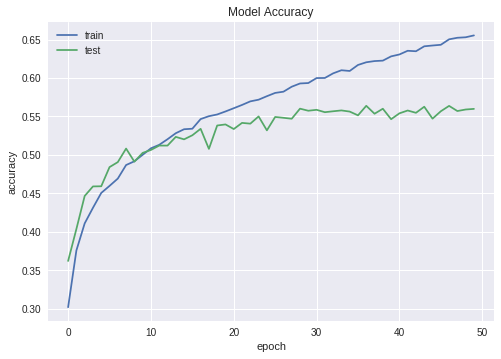

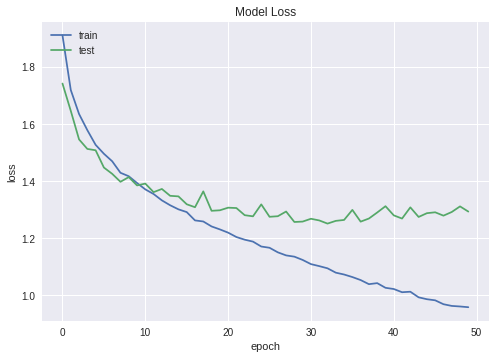

In [23]:

#Model 34 
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(256, activation = swish  ,kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(Dropout(0.18))
model.add(Dense(512,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0022),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






**So we have found the best Network Layer Combination as - 512, 512 , 128 **

** I will experiment now for the Activation Function - Relu , Elu , Swish , LeakyReLU, Tanh**

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_63 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_64 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 1

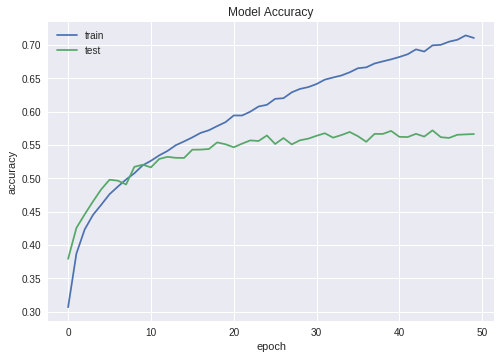

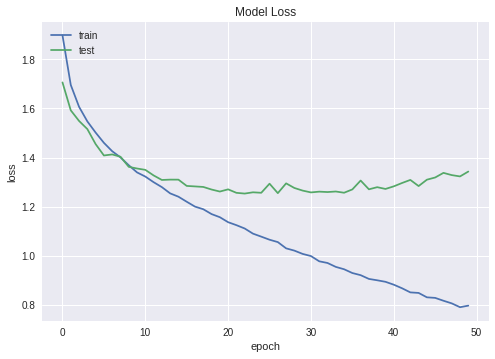

In [28]:
# Experiment for Best Activation Function 
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50

  
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = swish ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.18))
model.add(Dense(512,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_65 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_67 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 1

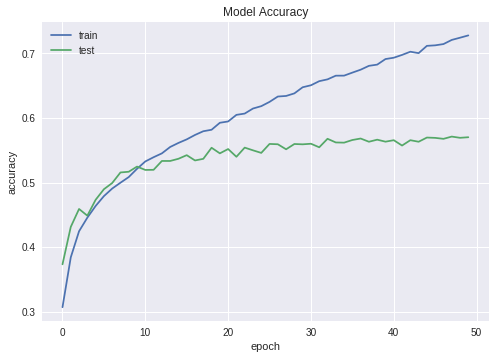

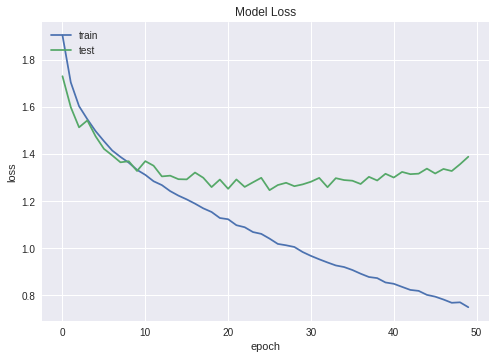

In [29]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = swish  ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.18))
model.add(Dense(512,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(128,activation = swish, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_69 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_70 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 1

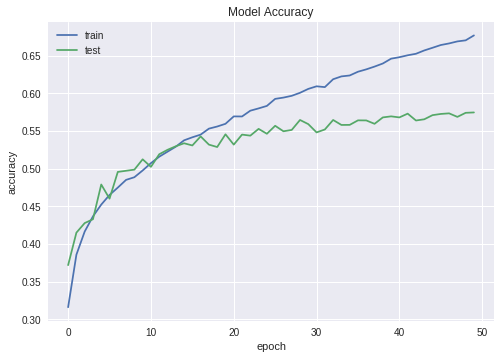

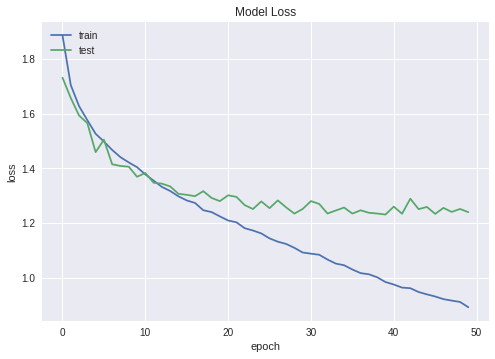

In [30]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.18))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 1

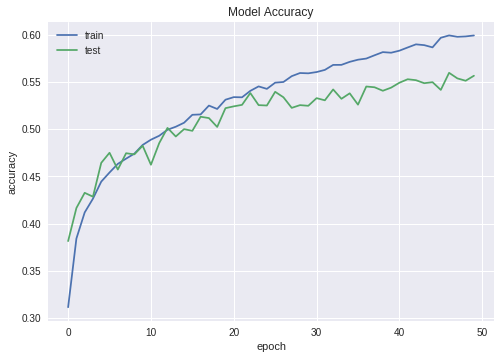

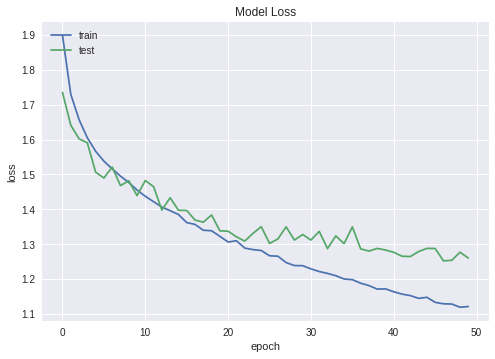

In [33]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512 ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_78 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_79 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 1

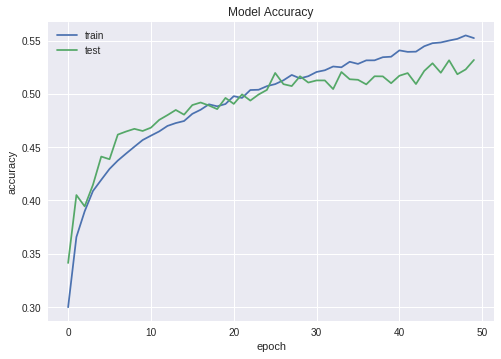

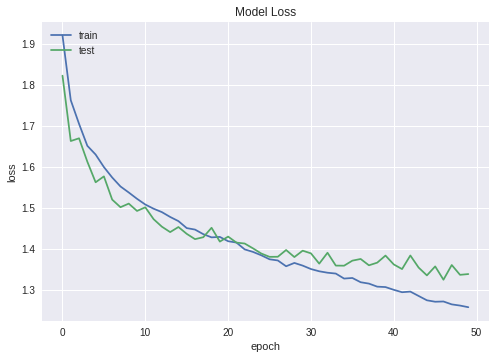

In [35]:
#Model 36
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512 ,activation= 'tanh',kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512, activation= 'tanh', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(128, activation= 'tanh', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






** So the Best Activation Function for my Models is elu and Swish** 

** I will use elu further for testing of Dropout Rates & Learning rates **

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_80 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_81 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_115 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_82 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 1

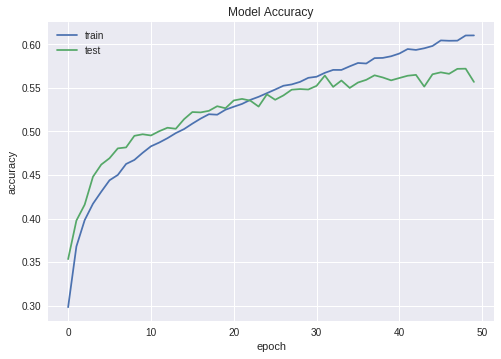

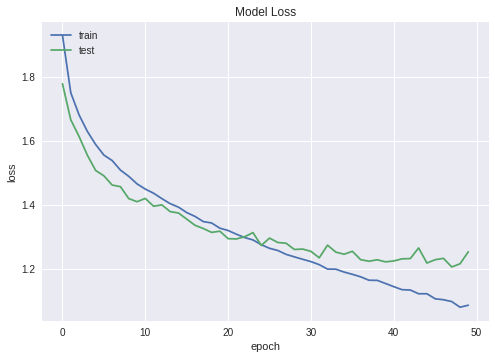

In [36]:
### Testing for Dropout Rates - 

\
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_84 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_85 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 1

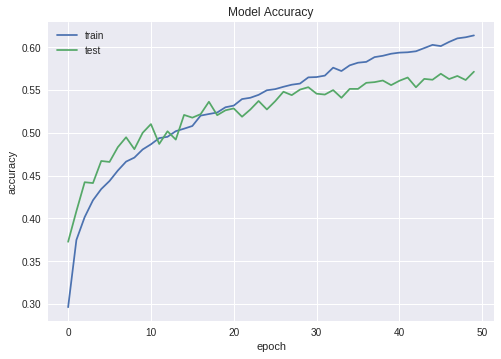

In [37]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [38]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_86 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_87 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_88 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 1

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_92 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_93 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_94 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 1

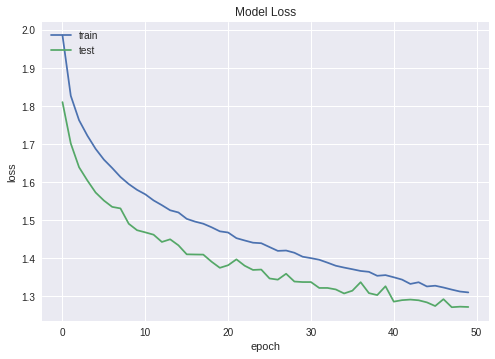

In [40]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_95 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_96 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_97 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 1

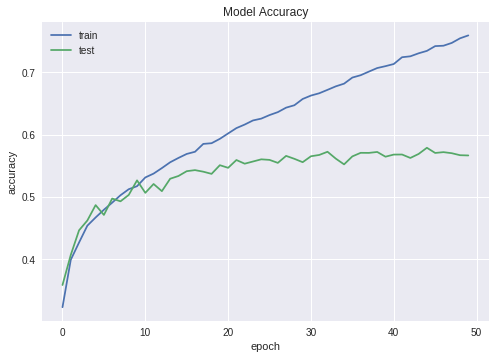

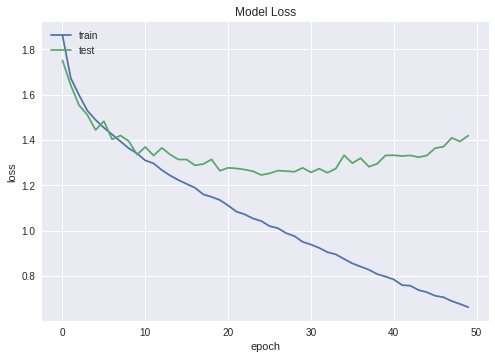

In [41]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_138 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_139 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_140 (Dense)            (None, 10)                1290      
Total params: 1,902,986
Trainable params: 1,902,986
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8457 - acc: 0.3316 - val_loss: 1.7332 - val_acc: 0.3781
Epoch 2/50
50000/50000 [=============

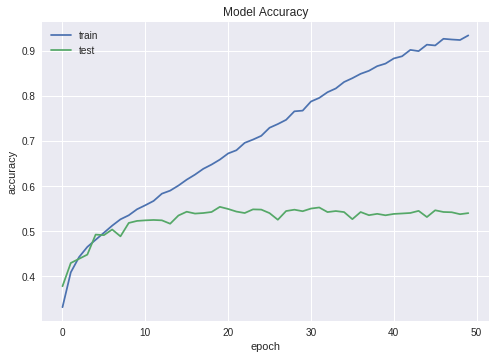

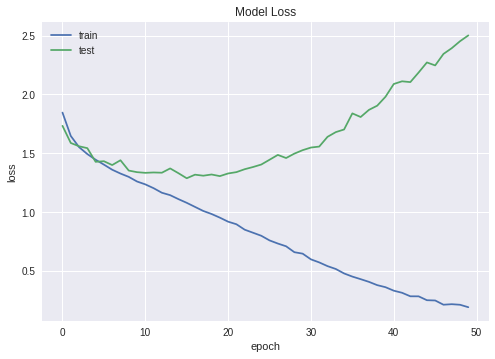

In [42]:
#Model 38
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
#model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_98 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_99 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 1024)              525312    
_________________________________________________________________
dropout_100 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_144 (Dense)            (None, 1

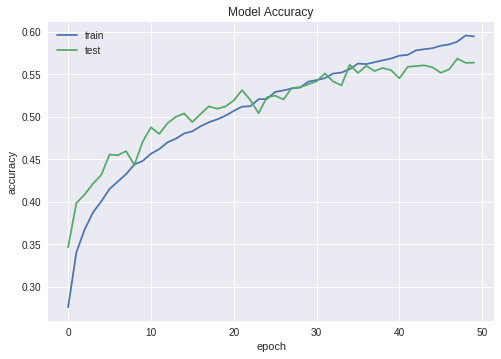

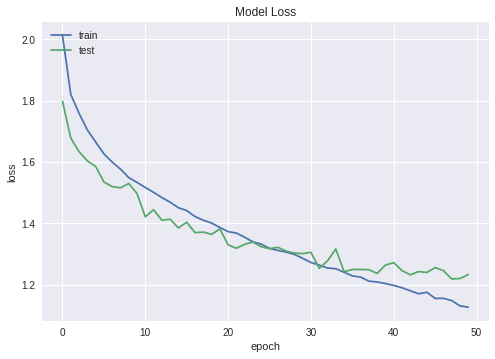

In [43]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [39]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 65


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_89 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_126 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_90 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_91 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 1

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_101 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_102 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_103 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 1

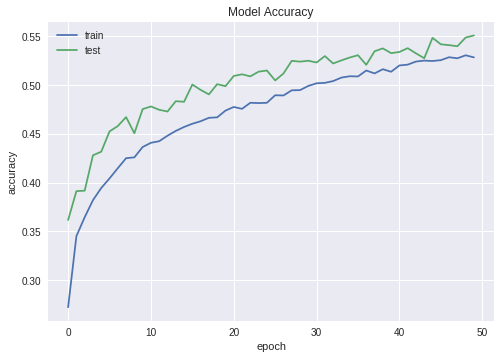

In [44]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_104 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_105 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_151 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_106 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 1

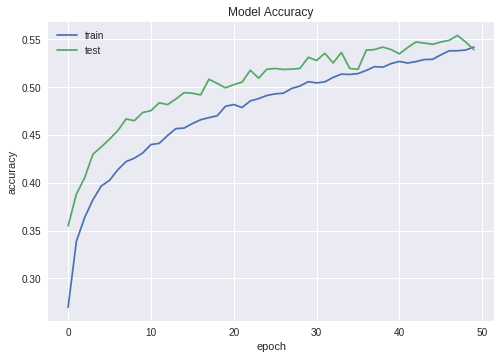

In [45]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






** Experiment for Learning rates **

50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_107 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_154 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_108 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_109 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_156 (Dense)            (None, 1

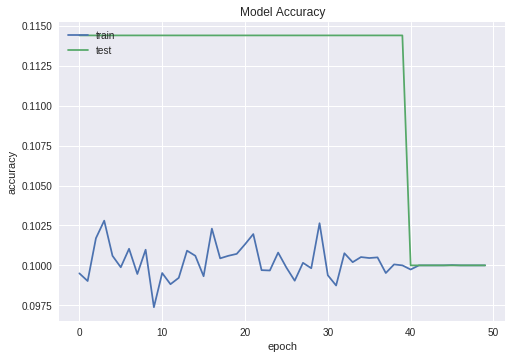

In [46]:
#Model 50 
#Experiment for the Learning Rate - 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=1.0),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_110 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_111 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_112 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_160 (Dense)            (None, 1

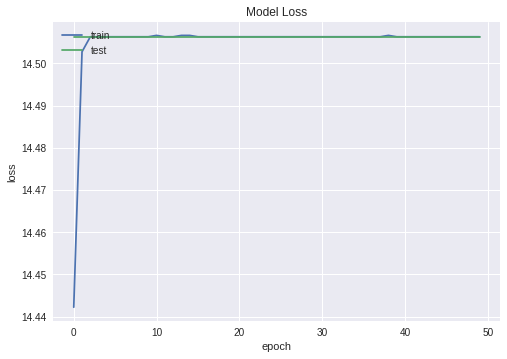

In [47]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.1),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_113 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_162 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_114 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_115 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 1

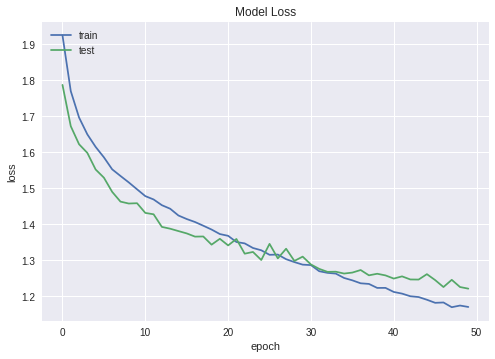

In [48]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.001),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_116 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_166 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_117 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_167 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_118 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_168 (Dense)            (None, 1

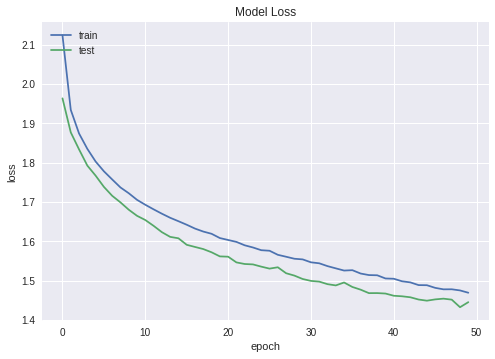

In [49]:
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0001),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_119 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_120 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_121 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 1

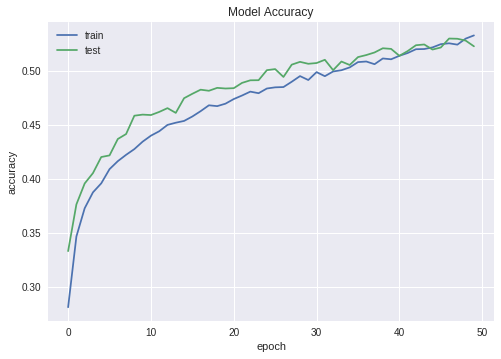

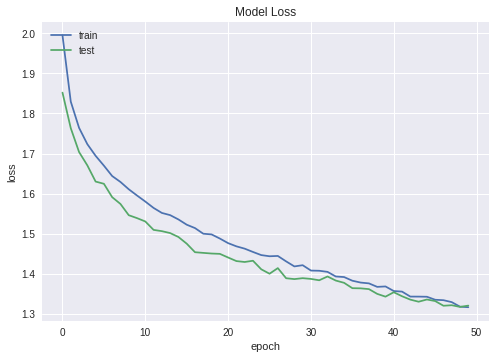

In [50]:

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0003),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_122 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_174 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_123 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_175 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_124 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_176 (Dense)            (None, 1

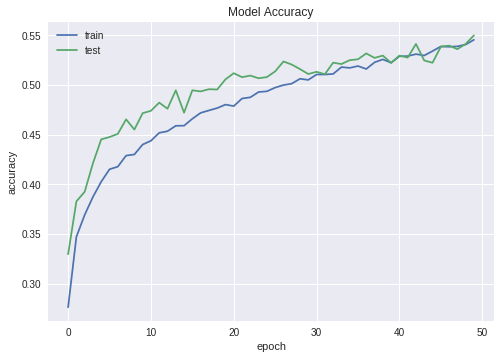

In [51]:
#Model 50 
#Experiment for the Learning Rate - 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.005),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_125 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_126 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_179 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout_127 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_180 (Dense)            (None, 1

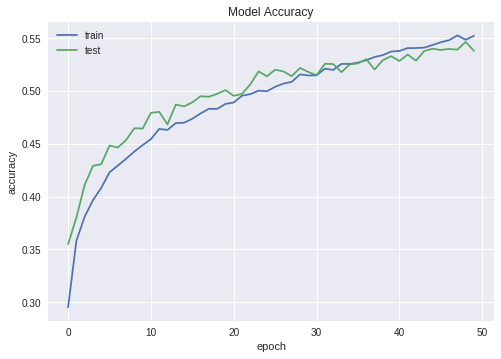

In [52]:
#Model 50 
#Experiment for the Learning Rate - 

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 50


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512, activation = 'elu' ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(512,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'elu', kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(lr=0.0005),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [34]:
#Model 36
#Experiment for the Batch Size (using the best models from last 2 parameters- optimizer & epochs)

# Experiment for no of epochs for the best optimizer 

# Adamax 

import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import adamax
import matplotlib.pyplot as plt

 
batch_size = 256
num_classes = 10
epochs = 70


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train Samples')
print(x_test.shape[0], 'test Samples')


# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#building the model for Multi Layer Perceptron 
model = Sequential()
model.add(Dense(512 ,kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.18))
model.add(Dense(512, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer = 'uniform', input_shape=(3072,)))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax', kernel_initializer = 'uniform'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=adamax(),
             metrics=['accuracy'])


train_history = model.fit(x_train, y_train,
                         batch_size= batch_size,
                         epochs= epochs,
                         verbose=1,
                         validation_data = (x_test, y_test),
                         shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






50000 train Samples
10000 test Samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               1573376   
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 1